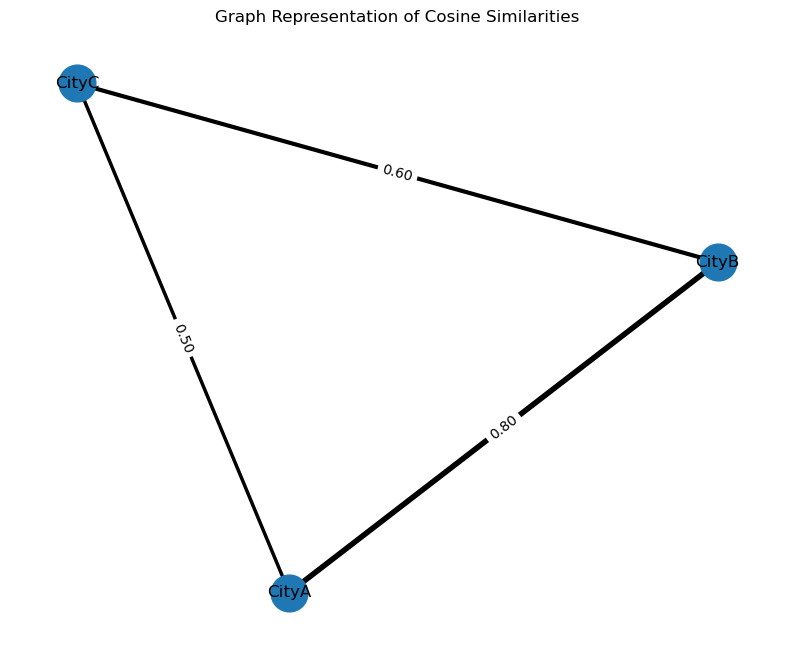

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

# Assume cosine_similarities_df is already defined
# Example DataFrame
cities = ['CityA', 'CityB', 'CityC']
cosine_similarities = [[1, 0.8, 0.5],
                       [0.8, 1, 0.6],
                       [0.5, 0.6, 1]]
cosine_similarities_df = pd.DataFrame(cosine_similarities, index=cities, columns=cities)

# Create a graph
G = nx.Graph()

# Add edges with weights from the cosine similarity matrix
for city1 in cosine_similarities_df.index:
    for city2 in cosine_similarities_df.columns:
        if city1 != city2:  # Exclude self-loops
            weight = cosine_similarities_df.loc[city1, city2]
            if weight > 0:  # Optional: Add a threshold to include only significant weights
                G.add_edge(city1, city2, weight=weight)

# Draw the graph
pos = nx.spring_layout(G)  # Position nodes using a spring layout
plt.figure(figsize=(10, 8))

# Draw nodes and labels
nx.draw_networkx_nodes(G, pos, node_size=700)
nx.draw_networkx_labels(G, pos, font_size=12)

# Draw edges with width proportional to weights
edges = G.edges(data=True)
nx.draw_networkx_edges(
    G,
    pos,
    edgelist=[(u, v) for u, v, _ in edges],
    width=[d['weight'] * 5 for _, _, d in edges]  # Scale weights for better visibility
)

# Add edge labels (weights)
edge_labels = {(u, v): f"{d['weight']:.2f}" for u, v, d in edges}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10)

plt.title("Graph Representation of Cosine Similarities")
plt.axis("off")  # Turn off the axes
plt.show()
